Weighted Hybrid

In [85]:
import pandas as pd
import numpy as np 

In [86]:
credits=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\recommend\tmdb_5000_credits.csv')

In [87]:
movies=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\recommend\tmdb_5000_movies.csv')

In [88]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [89]:
print(credits.shape)
print(movies.shape)

(4803, 4)
(4803, 20)


In [90]:
credits=credits.rename(index=str,columns={'movie_id':'id'})

In [91]:
df=movies.merge(credits,on='id')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title_x                 4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [93]:
df_clean=df.drop(['title_x','title_y','homepage','production_countries'],axis=1)

In [95]:
df_clean.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [96]:
v=df.vote_count
R=df.vote_average
C=df.vote_average.mean()
m=df.vote_count.quantile(0.70)#minimum vote required to be theredf.

In [97]:
df_clean['wa']=((R*v)+(C*m))/(v+m)

In [98]:
df_clean['wa'][:2]

0    7.148013
1    6.807627
Name: wa, dtype: float64

In [100]:
df_rank=df_clean.sort_values('wa',ascending=False)

In [101]:
df_rank[['original_title','vote_count','vote_average','wa','popularity']].head(10)

,original_title,vote_count,vote_average,wa,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


Recommendation based on sclaed wa and popularity 

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler=MinMaxScaler()
df_scale=scaler.fit_transform(df_clean[['wa','popularity']])
dfp_norm=pd.DataFrame(df_scale,columns=['wa','popularity'])
dfp_norm.head(2)


,wa,popularity
0,0.674339,0.171815
1,0.581403,0.158846


Find Difference between merge and join in pd 

In [104]:
df_clean[['nwa','npop']]=dfp_norm

In [105]:
df_clean['score']=df_clean['nwa']*0.5+df_clean['npop']*0.5

In [106]:
df_s=df_clean.sort_values(['score'],ascending=False)

In [169]:
df_s[['original_title','vote_count','vote_average','nwa','npop','score']].head()

,original_title,vote_count,vote_average,nwa,npop,score
95,Interstellar,10867,8.1,0.906439,0.827162,0.866801
546,Minions,4571,6.4,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,9742,7.9,0.851874,0.549462,0.700668
788,Deadpool,10995,7.4,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,9427,7.2,0.670973,0.495989,0.583481


<h5>Two types of recommendation are there </h5>
1.content based
2.collaborative based

On basis of previous watched movies predict the next movie for watch 

to do this we use correlation

In [110]:
column=['user_id','item_id','rating','timestamp']

In [117]:
u=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\recommend\u.data.txt',sep='\t',names=column)

In [118]:
u.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [114]:
mvr=pd.read_csv(r'C:\Users\My PC\Desktop\Machine Learning\Kaggle\ds\recommend\Movie_Id_Titles.csv')

In [116]:
mvr.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [121]:
df=pd.merge(u,mvr,on='item_id')

In [125]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [124]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('white')
%matplotlib inline 

In [133]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [134]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [136]:
rating=pd.DataFrame(df.groupby('title')['rating'].mean())

In [140]:
rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [142]:
rating['no of r']=pd.DataFrame(df.groupby('title')['rating'].count())

In [143]:
rating.head(3)

,rating,no of r
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


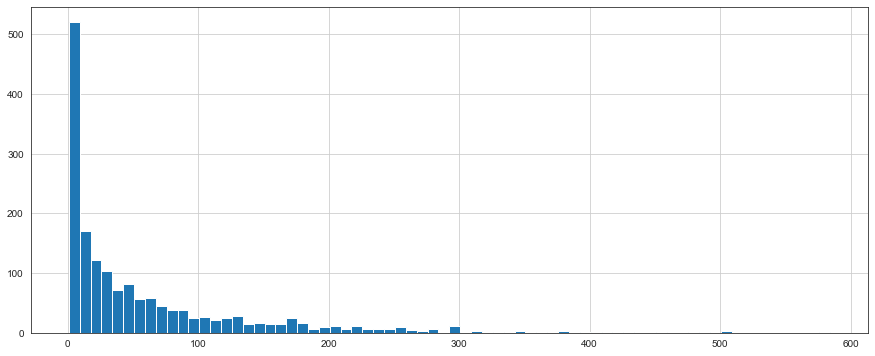

In [149]:
plt.figure(figsize=(15,6))
rating['no of r'].hist(bins=70)

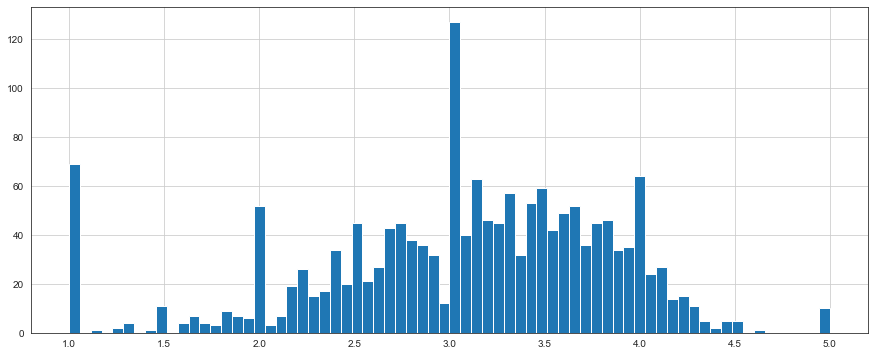

In [150]:
plt.figure(figsize=(15,6))
rating['rating'].hist(bins=70)

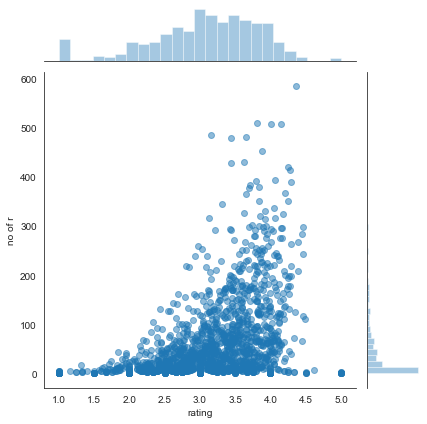

In [151]:
sns.jointplot('rating','no of r',rating,alpha=0.5)

In [154]:
moviemat=df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
rating.sort_values('no of r',ascending=False).head()

,rating,no of r
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [158]:
sim=moviemat['Star Wars (1977)']
sim.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [159]:
cor=moviemat.corrwith(sim)

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [160]:
cor_star=pd.DataFrame(cor,columns=['correlation'])
cor_star.dropna(inplace=True)
cor_star.head()

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [162]:
cor_star.sort_values('correlation',ascending=False).head()

,correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [163]:
cor_star_n=cor_star.join(rating['no of r'])

In [168]:
cor_star_n[cor_star_n['no of r']>100].sort_values('correlation',ascending=False).head()

,correlation,no of r
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
